# QF600 ASSETING PRCING
## HomeWork 1 EFFICIENT FRONTIER

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%whos

Variable               Type        Data/Info
--------------------------------------------
dataframe_columns      function    <function dataframe_columns at 0x10ccb9120>
dataframe_hash         function    <function dataframe_hash at 0x12a517600>
dtypes_str             function    <function dtypes_str at 0x10cc52700>
get_dataframes         function    <function get_dataframes at 0x12a6477e0>
getpass                module      <module 'getpass' from '/<...>b/python3.12/getpass.py'>
hashlib                module      <module 'hashlib' from '/<...>b/python3.12/hashlib.py'>
import_pandas_safely   function    <function import_pandas_safely at 0x10ccb9260>
is_data_frame          function    <function is_data_frame at 0x10ccb8cc0>
json                   module      <module 'json' from '/usr<...>on3.12/json/__init__.py'>
np                     module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd                     module      <module 'pandas' from '/u<...>ages/pandas/__init__.

In [4]:
data =\
    pd.read_csv("/Users/lu/Desktop/Industry_Portfolios.csv")

## <span style="color:red">计算平均收益和标准差</span>
### 计算每个行业的平均收益、标准差和协方差矩阵

###  Q1.1 Table Creation for the mean return and standard deviation of return.

In [6]:
data_1 =\
    data.drop(columns = ['Date'])

In [7]:
mean_returns =\
    data_1.mean()# 各行业的月度平均收益

sd_returns =\
    data_1.std()# 各行业的月度标准差（风险）

cov_matrix =\
    data_1.cov()# 是各行业收益之间的协方差矩阵，用于计算组合的总方差

summary = pd.concat([mean_returns, sd_returns], axis = 1)
summary.columns = ['MEAN RETURN', 'STANDARD DEVIATION RETURN']

summary

,MEAN RETURN,STANDARD DEVIATION RETURN
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


## <span style="color:red">计算最小方差边界</span>

### Q1.2 Minimum-Variance Frontier

In [9]:
mu = data.mean().values
cov_matrix_1 = np.linalg.inv(cov_matrix)

In [10]:
R = np.array(mean_returns)
V = np.array(cov_matrix)
e = np.ones(len(mean_returns))

In [11]:
inv_V = np.linalg.inv(V)

In [12]:
alpha = np.dot(np.dot(R.T, inv_V), e)# 组合的期望收益
print(alpha)
zeta = np.dot(np.dot(R.T, inv_V), R)# 方差
print(zeta)
delta = np.dot(np.dot(e.T, inv_V), e)# 单位向量
print(delta)

0.13794323869931885
0.19640858464482272
0.1373875973567116


$$ \sigma_p^2 = \frac{1}{\delta} + \frac{\delta}{\zeta \delta - \alpha^2}(r_p - r_{mv})^2 $$

In [14]:
expected_returns = np.arange(0, 2, 0.1)# 期望收益的范围

In [15]:
portfolio_var = []
for r_p in expected_returns:
    #print("r_p: ", r_p)
    # variance = (delta * r_p**2 - 2 * zeta * r_p + alpha) / (alpha * delta - zeta**2)
    variance = 1. / delta + (delta / (zeta * delta - alpha**2)) * ( ( r_p - alpha / delta ) ** 2)
    portfolio_var.append(variance)# 计算每个期望收益下的组合方差，并取平方根得到标准差 portfolio_sd。
#print("check : ", portfolio_var )
portfolio_sd = np.sqrt(portfolio_var)
#最小方差边界表示在给定期望收益水平下的最小风险组合

In [16]:
print(portfolio_sd)

[4.96865933 4.62520378 4.29451081 3.97976317 3.68504889 3.41555771
 3.17771336 2.97910534 2.82801233 2.73232821 2.69795476 2.7272112
 2.81811651 2.96500574 3.16008166 3.39504812 3.66223513 3.9551181
 4.26841081 4.59794314]


In [17]:
print(portfolio_var)

[24.68757549425759, 21.392509964329186, 18.442823093673947, 15.838514882291879, 13.57958533018298, 11.666034437347252, 10.09786220378469, 8.8750686294953, 7.997653714479077, 7.465617458736025, 7.2789598622661424, 7.4376809250694285, 7.941780647145885, 8.79125902849551, 9.986116069118305, 11.526351769014266, 13.411966128183401, 15.642959146625707, 18.219330824341174, 21.141081161329815]


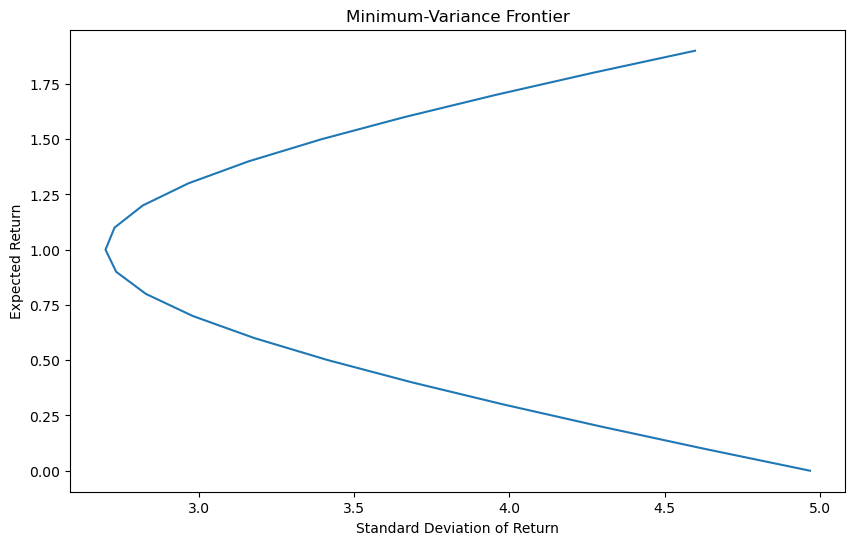

In [18]:
# 绘制最小方差边界图。
# 横轴为组合的标准差（风险），纵轴为期望收益，最小方差边界展示了给定收益水平下风险最小的组合。
plt.figure(figsize=(10, 6))
plt.plot(portfolio_sd, expected_returns, label='Minimum-Variance Frontier')
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-Variance Frontier')
plt.show()

### Q1.3 Explanation
The minimum variance frontier can help the investor build the optimal portfolio, which gets more returns with less risk. The investor can reduce some uncertainty of risk and improve the overall return of their portfolios by diversifying investment.

## <span style="color:red">计算有效前沿</span>
计算有效前沿上的组合方差和期望收益

### Q2.1 Support that the risk_free rate is 0.13%  per month to Plot The Efficient Frontier 

In [21]:
r_f = 0.13

$$ \sigma_p^2 = \frac{(r_p - r_f)^2}{\zeta - 2 \alpha r_f + \delta (r_f)^2} $$


sigma_p_sq 计算不同期望收益 r_p 下的组合方差，使用的是有效前沿的公式。\
eff_var 计算每个 sigma_p_sq 下的期望收益 r_p_2。\
有效前沿展示的是在无风险利率基础上，通过不同风险组合构建的收益-风险关系。

In [23]:
var = []
for r_p in expected_returns:
    sigma_p_sq = ((r_p - r_f)**2 / (zeta - (2 * alpha * r_f) + delta * (r_f)**2))**.5
    var.append(sigma_p_sq)
print(var)

[0.32212854665893675, 0.07433735692129309, 0.17345383281635054, 0.42124502255399426, 0.6690362122916378, 0.9168274020292814, 1.1646185917669252, 1.4124097815045689, 1.6602009712422126, 1.907992160979856, 2.1557833507174995, 2.4035745404551436, 2.6513657301927878, 2.89915691993043, 3.146948109668074, 3.394739299405718, 3.642530489143362, 3.8903216788810058, 4.138112868618649, 4.385904058356292]


$$ r_p = r_f + (\zeta - 2 \alpha r_f + \delta (r_f^2))^{\frac{1}{2}} \sigma_p $$

In [25]:
eff_var = []
for sd_p in var:
    r_p_2 = r_f + (zeta - 2 * alpha * r_f + (delta * (r_f ** 2))) **.5 * sd_p
    eff_var.append(r_p_2)
print(eff_var)

[0.26, 0.16, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8000000000000002, 0.9000000000000001, 1.0, 1.1, 1.2000000000000006, 1.2999999999999998, 1.4, 1.5, 1.6000000000000005, 1.7000000000000006, 1.8000000000000003, 1.9000000000000004]


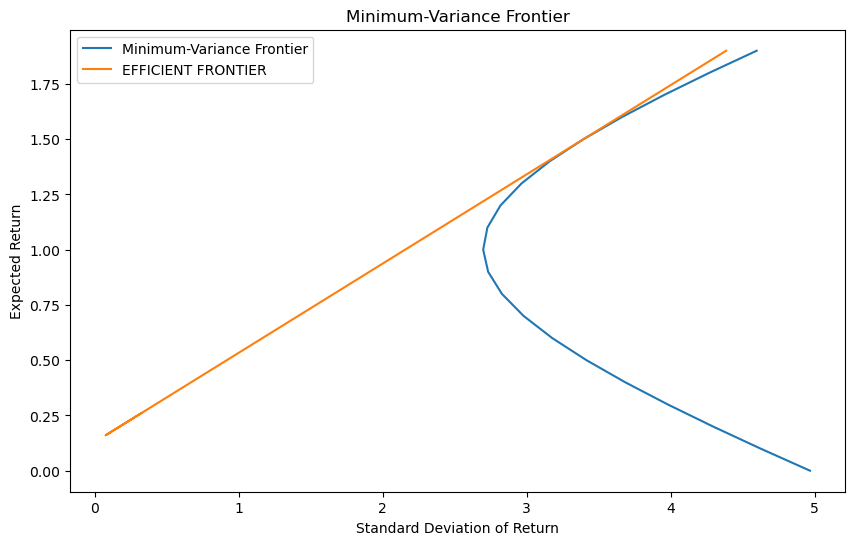

In [26]:
# 绘制最小方差边界和有效前沿
plt.figure(figsize=(10, 6))
plt.plot(portfolio_sd, expected_returns, label='Minimum-Variance Frontier')
plt.plot(var, eff_var, label = 'EFFICIENT FRONTIER')
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-Variance Frontier')
plt.legend()
plt.show()

### Q2.2 Explanation
The efficient frontier will provide a Scientific decision to help investors choose the optimal portfolio and emphasize the importance of asset allocation. Avoiding the investor focus too much on the performance of the individual asset so that they can be more reasonable diversification of investment to reduce the risk. Thereby, optimizing the balance between investment return and risks.

## <span style="color:red">计算 Sharpe 比率和切线组合</span>
计算 Sharpe 比率和切线组合的收益与风险

### Q3.1 Sharpe ratio

In [29]:
# 切线组合的期望收益，表示在无风险利率 r_f 基础上的最佳风险组合
r_tg = (alpha * r_f - zeta)/(delta * r_f - alpha)
print(r_tg)

1.4862735358446917


In [30]:
# 是切线组合的标准差，表示切线组合的风险
sigama_tg = -((zeta - 2 * alpha * r_f + delta * (r_f**2)) **.5)/ (delta * (r_f - alpha / delta))
print(sigama_tg)

3.360726330566368


In [31]:
# Sharpe 比率，用于衡量切线组合的风险调整收益，Sharpe 比率越高，组合的风险调整收益越好
shar_ratio = (r_tg - r_f) / sigama_tg
print(shar_ratio)

0.40356559934950875


## <span style="color:red">计算切线组合的权重</span>
a 和 b 是切线组合权重的系数

In [32]:
a = (delta * r_tg - alpha) / (zeta * delta - alpha ** 2)

In [33]:
b = (zeta - alpha * r_tg) / (zeta * delta - alpha ** 2)

### w_star 计算得到切线组合中各资产的最优权重，表示在 Sharpe 比率最大化下的组合配置。
### 切线组合位于有效前沿的最优点上，具有最高的 Sharpe 比率。

In [34]:
w_star = a * np.dot(inv_V, R) + b * np.dot(inv_V, e)
print(w_star)

[ 0.56797218 -0.2140726   0.71410511  0.10408719 -0.36343817 -0.09546326
  0.99164683  0.0755702   0.13264333 -0.91305081]


In [35]:
df = pd.DataFrame(w_star, data_1.columns, columns = ['WEIGHT'])
print(df)

         WEIGHT
NoDur  0.567972
Durbl -0.214073
Manuf  0.714105
Enrgy  0.104087
HiTec -0.363438
Telcm -0.095463
Shops  0.991647
Hlth   0.075570
Utils  0.132643
Other -0.913051


#### Q3.2 EXPLANATION
The tangency portfolio helps investors understand the tradeoff between the risk and the return. Then, investors can evaluate a portfolio of different risks to make better investment strategies. In the equilibrium market, the optimal risk-return portfolio of investment in the CML. The bigger the Sharpe ratio, the better the portfolio, the bigger the expected return.